# Simple Fake News Classifier - Dec 2020 - Mate Vasvary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Analysing Datasets (Kaggle Fake News and Real News Dataset)
https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset


At this point I am making sure I understand the datasets, checking for the similarities and differences between thhe fake news and real news one.

In [5]:
#Reading in data
real = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [17]:
print(fake.size)
print(real.size)
print(real.shape)
print(fake.shape)

93924
85668
(21417, 4)
(23481, 4)


In [5]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Get sizes for fake and real

In [7]:
#Subjects 
for key,count in fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Total Rows
print(f"Total Records:\t{fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


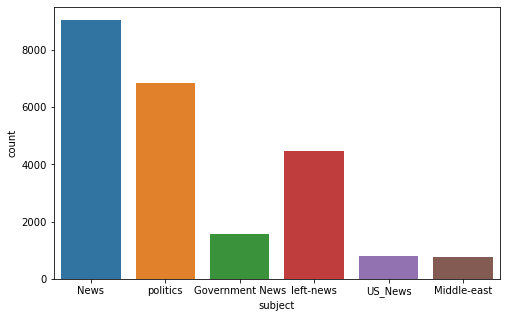

In [8]:
#Plot for subjects
plt.figure(figsize=(8,5))
sns.countplot("subject", data=fake)
plt.show()

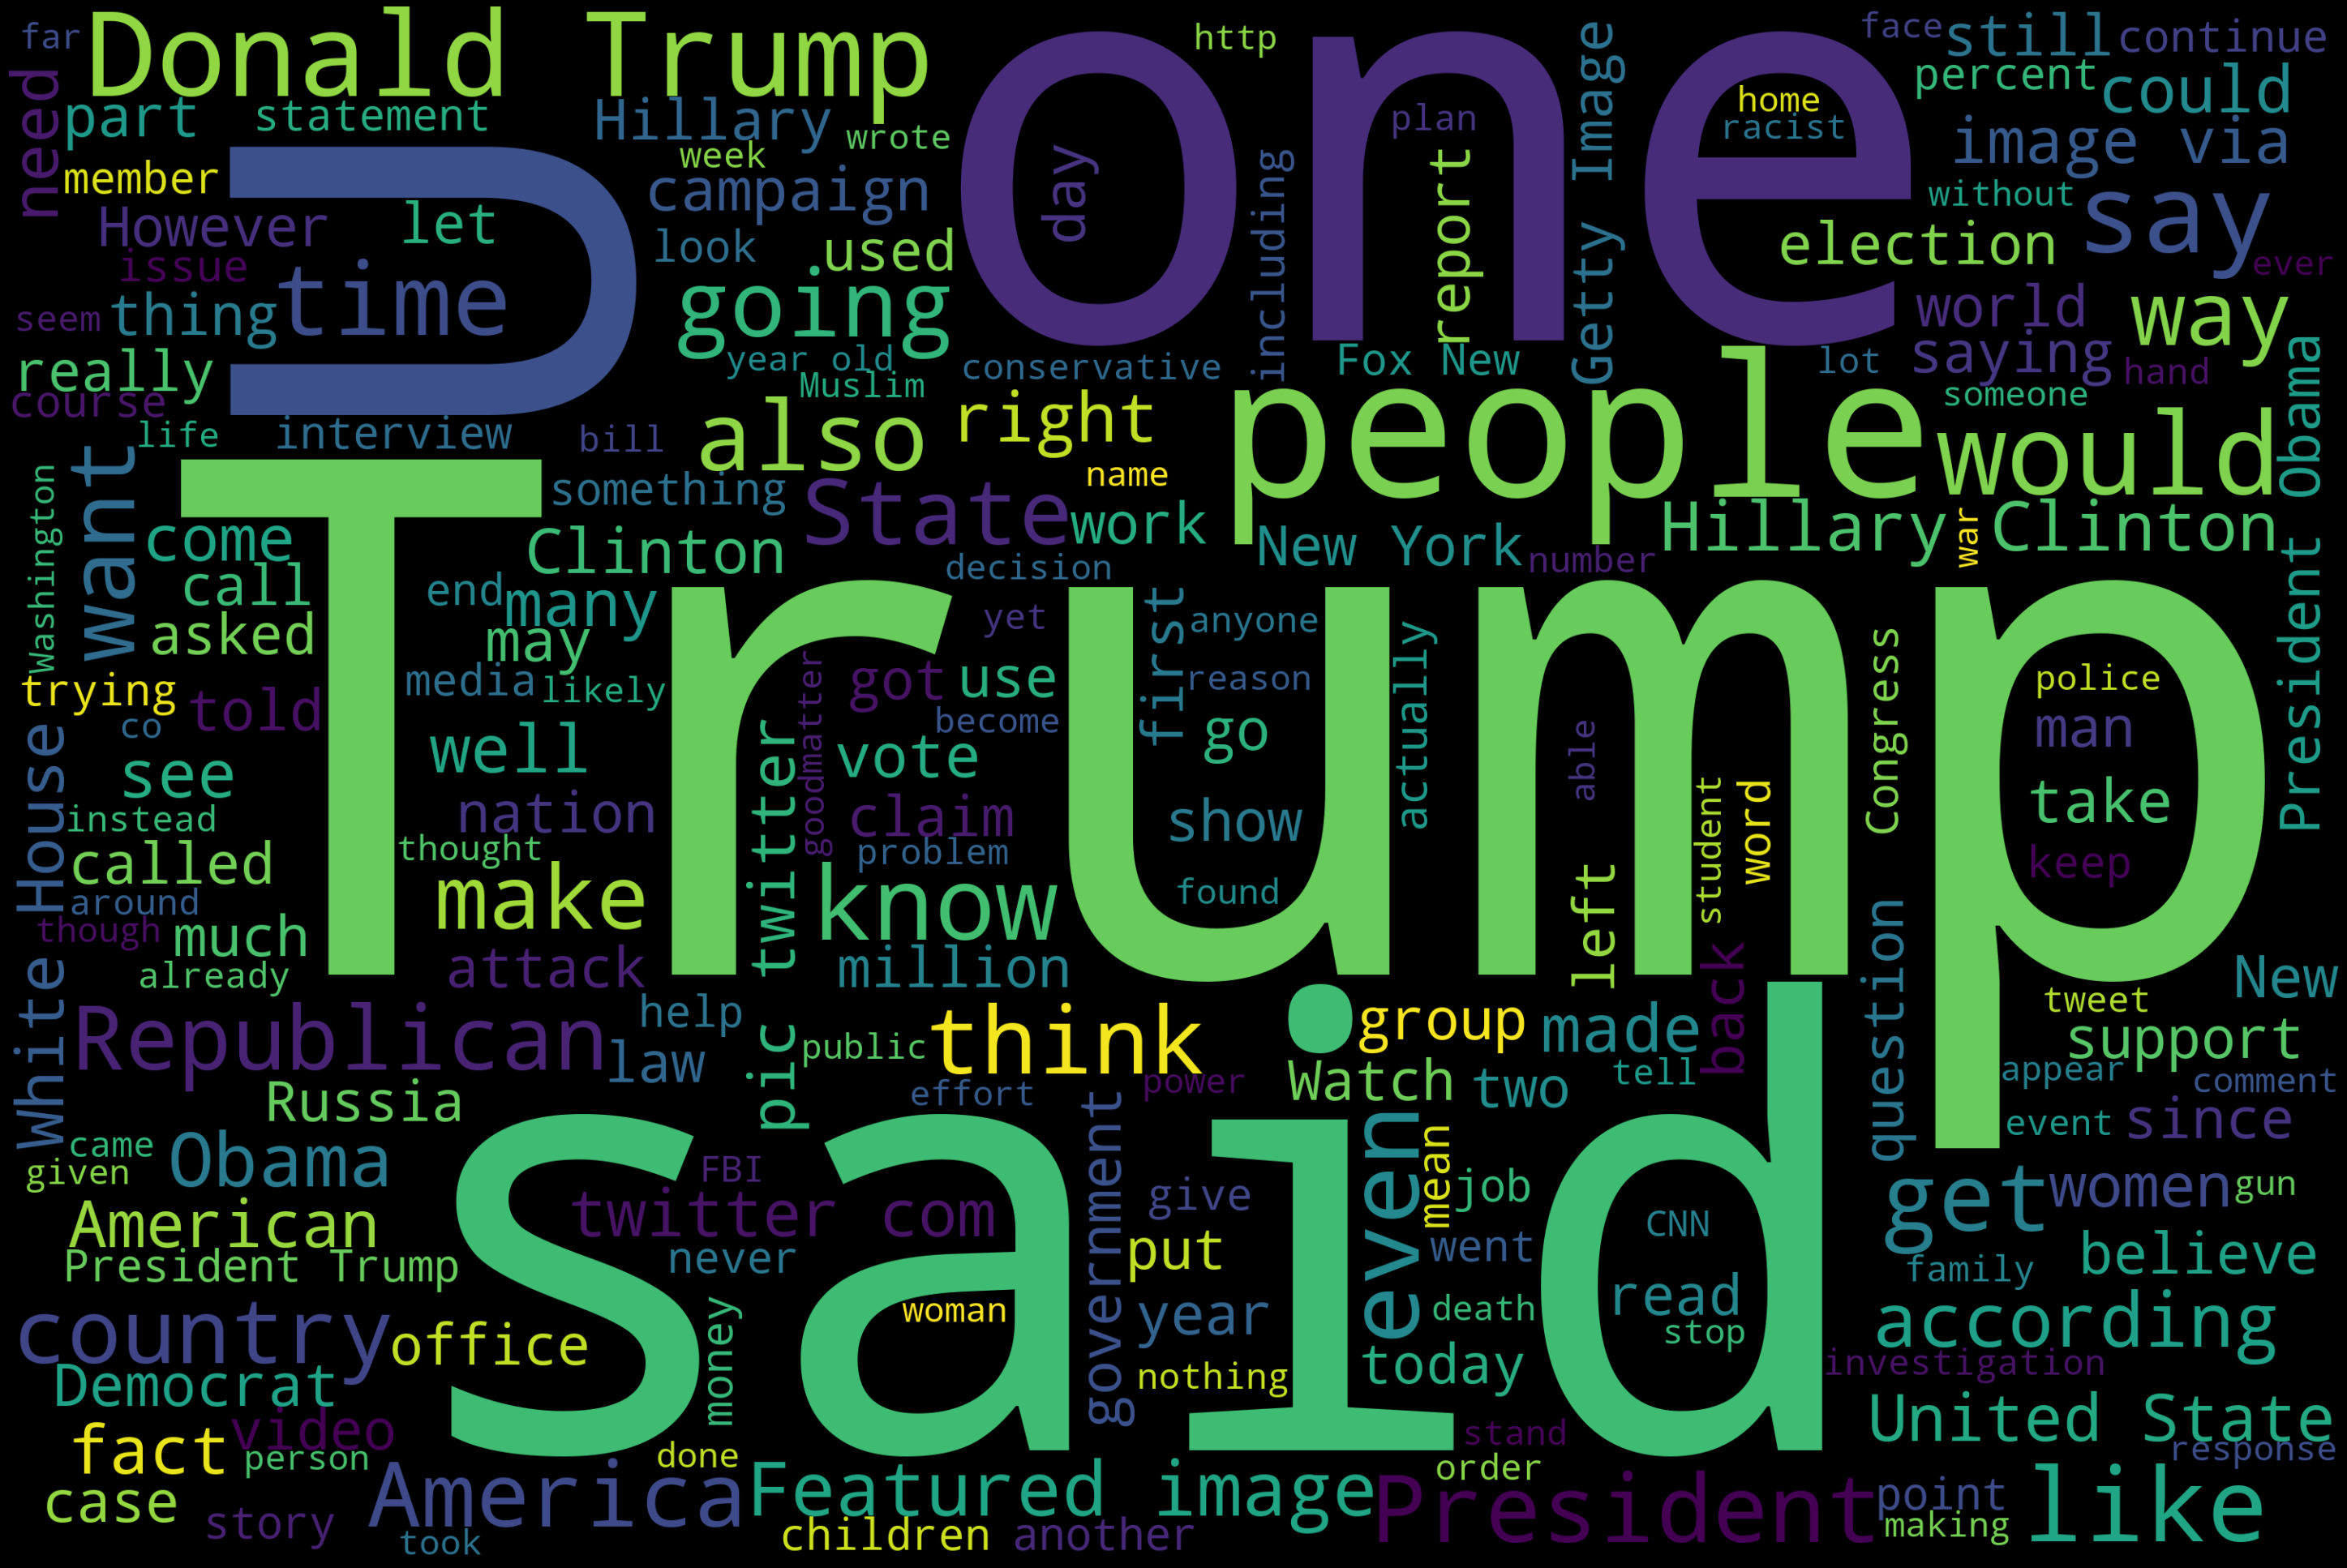

In [9]:
#Word Cloud
text = ''
for news in fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

In [10]:
#Getting Total Rows
print(f"Total Records:\t{real.shape[0]}")

#Counting by Subjects 
for key,count in real.subject.value_counts().iteritems():
  print(f"{key}:\t{count}")

Total Records:	21417
politicsNews:	11272
worldnews:	10145


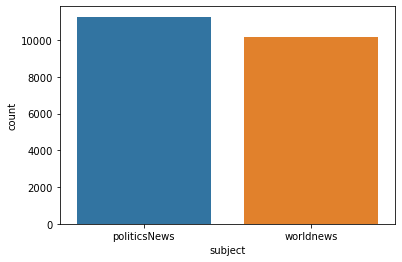

In [11]:
sns.countplot(x="subject", data=real)
plt.show()


# PREPROCESSING TEXT

In [12]:
# Assign a class value of 1 to legitimate news and a class value of 0 to fake news
real["class"] = 1
fake["class"] = 0

In [13]:
#Combining Title and Text
real["text"] = real["title"] + " " + real["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [14]:
# Subject is diffrent for real and fake thus dropping it
# Also dropping Date, title and Publication Info of real
real = real.drop(["subject", "date","title"], axis=1)
fake = fake.drop(["subject", "date", "title"], axis=1)

In [15]:
#Combining both into new dataframe
data = real.append(fake, ignore_index=True)
del real, fake

In [16]:
# Split the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(data["text"], data["class"], test_size=0.25)

In [17]:
# # Vectorize the text so the models can actually interpret it
# We will be ignoring stop words such as "the" "and" "or"  (possibly remove other things in the future such as single-character words)
vectorizer = TfidfVectorizer(stop_words=stopwords.words("english"))
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

# Logistic Regression model

In [18]:
log_reg = LogisticRegression()
log_reg.fit(x_train_vectorized, y_train)
pred = log_reg.predict(x_test_vectorized)
print(f"{log_reg.__class__.__name__} accuracy: {log_reg.score(x_test_vectorized, y_test)}")

LogisticRegression accuracy: 0.9869933184855234


# Decision tree classifier

In [19]:
decision_tree = DecisionTreeClassifier(max_depth=100)
decision_tree.fit(x_train_vectorized, y_train)

print(f"{decision_tree.__class__.__name__} accuracy: {decision_tree.score(x_test_vectorized, y_test)}")

DecisionTreeClassifier accuracy: 0.9958129175946547


# Random forest classifier

In [20]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=100)
random_forest.fit(x_train_vectorized, y_train)

print(f"{random_forest.__class__.__name__} accuracy: {random_forest.score(x_test_vectorized, y_test)}")

RandomForestClassifier accuracy: 0.9609799554565701


# Multinomial naive Bayes model

In [21]:
multi_nb = MultinomialNB()
multi_nb.fit(x_train_vectorized, y_train)
print(f"{multi_nb.__class__.__name__} accuracy: {multi_nb.score(x_test_vectorized, y_test)}")

MultinomialNB accuracy: 0.9401336302895323


# ROC Curves to show performance

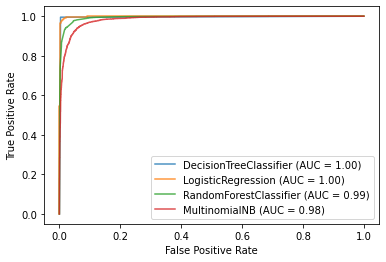

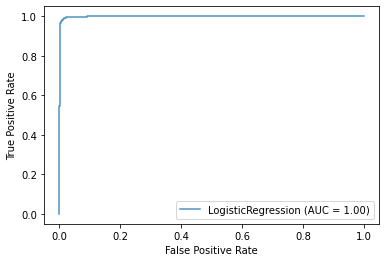

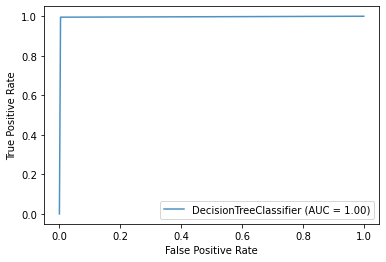

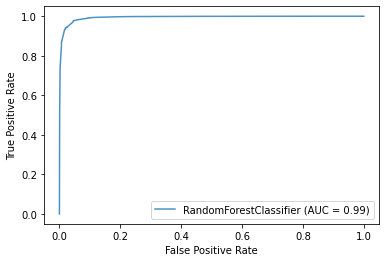

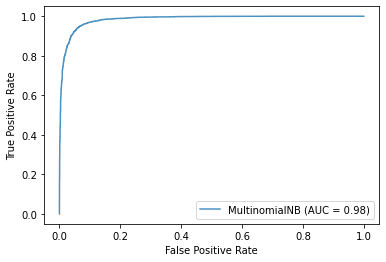

In [22]:
ax = plt.gca()
log_reg_disp = metrics.plot_roc_curve(log_reg, x_test_vectorized, y_test, alpha=0.8)
decision_tree_disp = metrics.plot_roc_curve(decision_tree, x_test_vectorized, y_test, alpha=0.8)
random_forest_disp = metrics.plot_roc_curve(random_forest, x_test_vectorized, y_test, alpha=0.8)
multi_nb_disp = metrics.plot_roc_curve(multi_nb, x_test_vectorized, y_test, alpha=0.8)
decision_tree_disp.plot(ax=ax, alpha=0.8)
log_reg_disp.plot(ax=ax,alpha=0.8)
random_forest_disp.plot(ax=ax,alpha=0.8)
multi_nb_disp.plot(ax=ax, alpha=0.8)

# Next Steps:

- More advanced pre-processing
- Adding sentiment and emotional analysis score as an additional input
- Adding more advanced machine learning models
- Additional datasets